# SOLUTIONS

# Item 1

## Solution Setup

In [245]:
# imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [246]:
# datasets
x = np.array([6,35,77,4,27,7,16,61,14,84,91,30,72,12,77,80,4,48,90,95]).reshape(-1,1)
y = np.array([105,117,128,101,113,104,106,123,103,138,132,108,129,108,128,130,95,108,143,137])

x_train = np.array([35 ,77 ,4  ,7  ,16 ,61 ,14 ,84 ,30 ,72 ,12 ,77 ,4 ,90 ,95]).reshape(-1,1)
y_train = np.array([117,128,101,104,106,123,103,138,108,129,108,128,95,143,137])

x_test = np.array([6  ,27 ,91 ,80 ,48]).reshape(-1,1)
y_test = np.array([105,113,132,130,108])

In [247]:
# Create and fit model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [248]:
# Get coefficients
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(x, y)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R²: {r_squared}")

Slope: 0.42966246403592906
Intercept: 98.44592329224267
R²: 0.9127427230569518


## 1.1 Determine the simple linear regression equation that best fits the data.

## Answer: f(x) = 0.43x + 98.45

## 1.2 Create a scatter plot representing the relationships in the tabulated data. Include the regression line in the plot. 

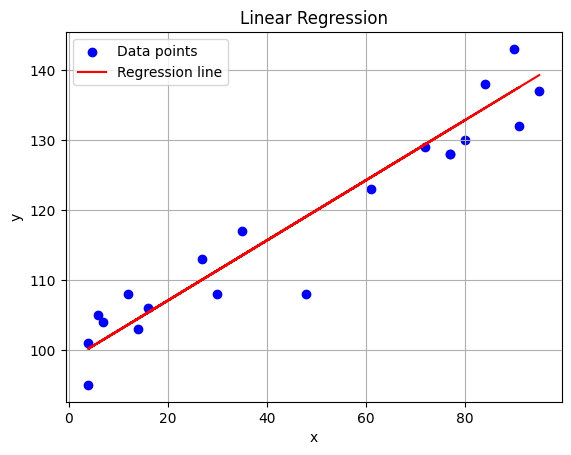

In [249]:
# Predict y values along x (regression equation)
regression_ling = model.predict(x)

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, regression_ling, color='red', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

## 1.3 Calculate the testing and testing 𝑅2. 

## Answers:
## Training R2: 0.9521
## Testing R2: 0.7066

In [250]:
# Predict
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# R2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training R2: {r2_train:.4f}")
print(f"Testing R2: {r2_test:.4f}")

Training R2: 0.9521
Testing R2: 0.7066


## 1.4  What would be the expected number of units sold if the company does not spend anything on advertising? 

## Answer: f(0) == 98.4459

In [258]:
x = 0

no_adv_pred = model.predict(np.array([[x]]))

print(f"f({x}) == {no_adv_pred[0]:.4f}")

f(0) == 98.4459


## 1.5 If the company spends 50 dollars, what would be the expected number of units it can sell?

## Answer: f(50) == 119.9290

In [260]:
x = 50

no_adv_pred = model.predict(np.array([[x]]))

print(f"f({x}) == {no_adv_pred[0]:.4f}")

f(50) == 119.9290


## 1.6 Suppose the company spends 1000 dollars on advertising. What would be the expected number of units sold? Explain why you would or would not be willing to trust this prediction. 

### Answer: f(1000) == 528.1084
The model was fitted with only data with x ranging from around 1 to 100. 1000 is far outside the range. The model assumes that the relationship between dollars spent on advertising and units sold stays the same (linear) all throughout, but we all know it does not behave that way in the real world. There may be a point wherein that relationship starts to change (Not enough customers, diminishing return, etc.)

In [263]:
x = 1000

no_adv_pred = model.predict(np.array([[x]]))

print(f"f({x}) == {no_adv_pred[0]:.4f}")

f(1000) == 528.1084


# Item 2

My understanding of the objective function below: An equation made to find the best coefficients in a model to find the minimum loss for each predictor variable given a penalty (the part with lambda). Basically, this is for finding the best values for each coefficient wherein we have the minimum overall loss. The 2nd part with lambda is for regularization, and is for avoiding overfitting. The strength of the regularization is determined by the value of lambda.

The value used for the penalty term is just the absolute value of the coefficient. This gives a linear but rougher shrinking of the resulting coefficient value, making it more likely to get close to zero.

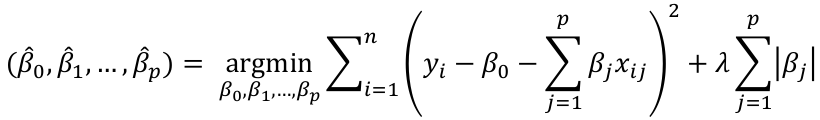

Assuming 𝜆 ≥ 0 is an arbitrary value, provide an analysis on the effect on the parameter estimates under the following settings: 

## 2.1 Setting 𝜆 = 0

## Answer:

Setting lambda to 0 will completely disregard the penalty part (2nd part) of the objective function. This means the model will be fitted with only the given data points in mind, with little to no room for data that are outside the training (and are noisy). This can lead us to overfitting. The tiniest amount of noise in the test data will produce a big number for test error.

How does this effect the resulting coefficients? It will steer the coefficients into larger number, away from 0-- hightening the influence of the predictors.

## 2.2 Setting 𝜆 ≪ min 1≤𝑗≤𝑝 |𝛽𝑗|

## Answer:

Penalty no longer is disregarded, but is still too small. Strength of regularization is proportional to the minimum value of a coefficient, wherein it will be too weak. This value of lambda allows for a more better fit in data, but still runs the risk of overfitting if there is much noise in the data.

## 2.3 Setting 𝜆 ≪ max 1≤𝑗≤𝑝 |𝛽𝑗|

## Answer:

Regularization strength is much larger than the max coefficient value. This means the penalty is very strong relative to all the coefficients in the model. This results in a model that is very susceptible to underfitting, since the huge penalties will steer the model to accomodating a lot of noises and lessening(or even ignoring) the influence of predictors.

How does this affect the resulting coefficients? It will steer the coefficents towards 0 (ignoring predictors, or at least close to it).

With all predictors being likely to be ignored, or less influential, the prediction mostly relies on the intercept.

# Item 3

My understanding of the objective function below: A function with the same objective as from Item 2, but now the values considered for the regularization now uses the Squared instead of Absolute Values. This means that the penalty term shrinks the coefficients more efficiently-- as close to 0 as possible but can also move smoothly away from 0.

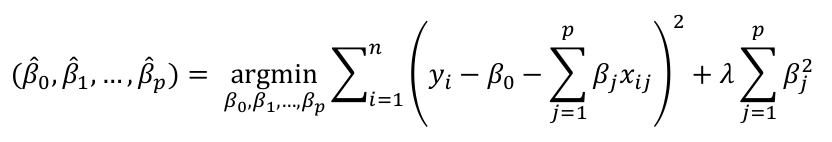

## 3.1  Setting 𝜆 = 0

## Answer:

Same as with Item 2.1, the penalty also disappears. The Coefficients are steered far away from 0, hightening their influence. This makes the model highly accustomed to the given training data- very susceptible to overfitting.

## 3.2 Setting 𝜆 ≪ ( min 1≤𝑗≤𝑝 |𝛽𝑗|) ^ 2

## Answer:

In this case, the model has a regularization but is very marginal (proportional to the minimum coefficient). This means that coefficients are still more likely to steer far away from 0. If ever the penalty inches a coefficient towards 0, the shrinkage of the the value will be very smooth- inching slowly to 0 but never approaching it. Same with Item 2.2, this allows for better fit than completely disregarding the Regularization, but still runs the risk of overfitting.

## 3.3 Setting 𝜆 ≪ ( max 1≤𝑗≤𝑝 |𝛽𝑗|) ^ 2

## Answer:

In this case, the strength of regularization is very strong and dominates the function. Similar to Item 2.3, coefficients are heavily influenced to be closer to 0, but due to the squared nature they will never be 0 (BUT they will be very close to!). It runs the very same problem with Item 2.3, where in it is very susceptible to underfitting.

With all predictors being likely to be ignored, or less influential, the prediction mostly relies on the intercept.

# Item 4 Solution in PDF

# Item 5 Solution in PDF

# Item 6

## Solution Setup

In [271]:
# imports
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [272]:
# datasets

x_train = np.array([
    [10.99, 10.69, 4.52],
    [9.72, 10.65, 4.81],
    [11.3, 11.29, 3.89],
    [13.05, 12.52, 3.8],
    [9.53, 9.94, 5.81],
    [9.53, 8.92, 6.36],
    [13.16, 13.26, 4.93],
    [11.53, 10.56, 6.0],
    [9.06, 8.4, 5.36],
    [11.09, 11.18, 4.35],
    [9.07, 9.44, 5.36],
    [9.07, 9.15, 6.54],
    [10.48, 10.43, 4.96],
    [6.17, 6.02, 6.56],
    [6.55, 5.81, 2.38],
    [8.88, 8.52, 5.82],
    [7.97, 7.74, 5.09],
    [10.63, 11.16, 4.7],
    [8.18, 8.36, 5.09],
    [7.18, 6.29, 3.01]
])
y_train = np.array([58.76, 58.14, 58.96, 66.8, 53.91, 49.25, 71.62, 61.26, 48.69, 59.6, 48.99, 51.29, 56.52, 35.36, 32.59, 49.95, 48.02, 59.79, 47.05, 36.09])

x_test = np.array([
    [12.93, 13.09, 4.78], 
    [9.55, 9.36, 5.36], 
    [10.14, 9.8, 6.48], 
    [7.15, 7.46, 4.48], 
    [8.91, 9.43, 4.19], 
    [10.22, 10.69, 4.5], 
    [7.7, 7.28, 5.92], 
    [10.75, 10.6, 5.33], 
    [8.8, 8.96, 4.47], 
    [9.42, 9.9, 5.51]
])
y_test = np.array([66.07, 52.49, 56.28, 46.09, 49.92, 57.61, 43.09, 56.29, 51.24, 55.55])

## 6.1 Fit a multiple linear regression model using the training data. (1 pt) 

## Answer:
## Regression equation:
## y = 1.62*x1 + 3.36*x2 + 0.77*x3 + 1.21

In [273]:
# Create and fit model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [275]:
# Equation (From Fitting Training Data into Linear Regression Model)
coefficients = model.coef_ 
intercept = model.intercept_

print("Regression equation:")
print(f"y = {coefficients[0]:.2f}*x1 + {coefficients[1]:.2f}*x2 + {coefficients[2]:.2f}*x3 + {intercept:.2f}")

Regression equation:
y = 1.62*x1 + 3.36*x2 + 0.77*x3 + 1.21


## 6.2 Create a table that compares the predictions of your model to the target values of the training set. 

In [276]:

y_train_pred = model.predict(x_train)

table = pd.DataFrame(x_train, columns=['x1', 'x2', 'x3'])
table['Actual y'] = y_train_pred
table['Predicted y'] = y_train_pred.round(2)
table['Difference'] = (y_train - y_train_pred).round(2)


print(f"Regression Equation: y = {coefficients[0]:.2f}*x1 + {coefficients[1]:.2f}*x2 + {coefficients[2]:.2f}*x3 + {intercept:.2f}")
print(table)

Regression Equation: y = 1.62*x1 + 3.36*x2 + 0.77*x3 + 1.21
       x1     x2    x3   Actual y  Predicted y  Difference
0   10.99  10.69  4.52  58.393199        58.39        0.37
1    9.72  10.65  4.81  56.418537        56.42        1.72
2   11.30  11.29  3.89  60.428168        60.43       -1.47
3   13.05  12.52  3.80  67.329460        67.33       -0.53
4    9.53   9.94  5.81  54.492473        54.49       -0.58
5    9.53   8.92  6.36  51.490024        51.49       -2.24
6   13.16  13.26  4.93  70.856782        70.86        0.76
7   11.53  10.56  6.00  59.966719        59.97        1.29
8    9.06   8.40  5.36  48.215993        48.22        0.47
9   11.09  11.18  4.35  60.070067        60.07       -0.47
10   9.07   9.44  5.36  51.722825        51.72       -2.73
11   9.07   9.15  6.54  51.652759        51.65       -0.36
12  10.48  10.43  4.96  57.029157        57.03       -0.51
13   6.17   6.02  6.56  36.453312        36.45       -1.09
14   6.55   5.81  2.38  33.165850        33.17       -0

## 6.3  Calculate the adjusted training 𝑅2.

Equation:

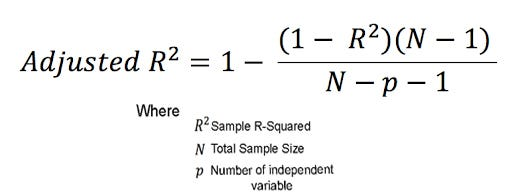

In [277]:
training_r2 = r2_score(y_train, y_train_pred)

n = x_train.shape[0] # rows - sample size
p = x_train.shape[1] # columns - independent variables

# Adjusted R2
training_r2_adj = 1 - ((1 - training_r2) * (n - 1)) / (n - p - 1)

print(f"Adjusted Training R2: {training_r2_adj:.2f}")


Adjusted Training R2: 0.97


## 6.4 . Create a table that compares the predictions of your model to the target values of the testing set. 


In [278]:

y_test_pred = model.predict(x_test)

table = pd.DataFrame(x_test, columns=['x1', 'x2', 'x3'])
table['Actual y'] = y_test_pred
table['Predicted y'] = y_test_pred.round(2)
table['Difference'] = (y_test - y_test_pred).round(2)


print(f"Regression Equation: y = {coefficients[0]:.2f}*x1 + {coefficients[1]:.2f}*x2 + {coefficients[2]:.2f}*x3 + {intercept:.2f}")
print(table)

Regression Equation: y = 1.62*x1 + 3.36*x2 + 0.77*x3 + 1.21
      x1     x2    x3   Actual y  Predicted y  Difference
0  12.93  13.09  4.78  69.797876        69.80       -3.73
1   9.55   9.36  5.36  52.233807        52.23        0.26
2  10.14   9.80  6.48  55.526062        55.53        0.75
3   7.15   7.46  4.48  41.285689        41.29        4.80
4   8.91   9.43  4.19  50.533814        50.53       -0.61
5  10.22  10.69  4.50  57.127458        57.13        0.48
6   7.70   7.28  5.92  42.677011        42.68        0.41
7  10.75  10.60  5.33  58.321427        58.32       -2.03
8   8.80   8.96  4.47  48.992038        48.99        2.25
9   9.42   9.90  5.51  53.949941        53.95        1.60


## 6.5  Calculate the adjusted testing 𝑅2.

## Answer: Adjusted Training R2 = 0.80

In [280]:
testing_r2 = r2_score(y_test, y_test_pred)

n = x_test.shape[0] # rows - num of data
p = x_test.shape[1] # columns - num of features

# Adjusted R²
testing_r2_adj = 1 - ((1 - testing_r2) * (n - 1)) / (n - p - 1)

print(f"Adjusted Training R2: {testing_r2_adj:.2f}")


Adjusted Training R2: 0.80


## 6.6 Calculate the Variance Inflation Factor of each feature

Formula:

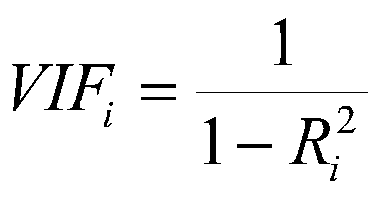

Will just use `variance_inflation_factor` from `statsmodel` library instead of writing the equation myself

## Answer: 
## x1 = 475.187852
## x2 = 452.585982
## x3 =  14.579260

In [281]:
# Combining train and test x
x_combined = np.concatenate((x_train, x_test), axis=0)

X_df = pd.DataFrame(x_combined, columns=['x1', 'x2', 'x3'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

print(vif_data)

  Feature         VIF
0      x1  475.187852
1      x2  452.585982
2      x3   14.579260


## 6.7  Determine if there are any features in the data that are potentially causing multicollinearity. If there are any, discuss ways of handling this multicollinearity. 

Answer:

The VIF of all three features showcases a serious multicollinearity based on their VIF values. x1 and x2 are severely correlated with each other. x3 exhibits such relationship too, but not as serious with the previous features.  This can clearly be seen in the given dataset where x1 and x2 are always very near with each other. The model needs to be updated, and one of the two strongly correlated features can be dropped (or merged into 1).

In my case, I will just combine the first two features (x1 and x2) into 1, by getting their average per row.

## 6.8 Provide the updated model after having performed the suggested remedy in the  previous item (item g). If you don’t think the model needs to be updated, then provide an explanation.

## Answer:
## X1 and X2 Combined = 14.281772
## X3 = 14.281772
## Still very high, but at least better than having 400+

In [283]:
# splitting each column
x1_train = x_train[:, 0]
x2_train = x_train[:, 1]
x3_train = x_train[:, 2]

x1_test = x_test[:, 0]
x2_test = x_test[:, 1]
x3_test = x_test[:, 2]

# merging x1 and x2
x_train_combined = (x1_train + x2_train) / 2
x_test_combined = (x1_test + x2_test) / 2

# merging it all back again
x_train_new = np.column_stack((x_train_combined, x3_train))
x_test_new = np.column_stack((x_test_combined, x3_test))

# Fitting training data
model.fit(x_train, y_train)

# Combining train and test x
x_combined = np.concatenate((x_train_new, x_test_new), axis=0)

X_df = pd.DataFrame(x_combined, columns=['x1_x2', 'x3'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

print(vif_data)

  Feature        VIF
0   x1_x2  14.281772
1      x3  14.281772


# Item 7

## Solution Setup

In [284]:
# importing dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [285]:
# loading dataset
train_data = pd.read_csv('dataset/item_7_testing_data.csv')
test_data = pd.read_csv('dataset/item_7_training_data.csv')

train_data.head(5)


,X,Y
0,7.167664,25.705616
1,26.162403,25.401778
2,30.138169,25.246047
3,8.065476,26.001570
4,1.959390,25.100929


In [286]:
# extracting dependent and independent variables

x_train = np.array(train_data['X']).reshape(-1, 1)
y_train = np.array(train_data['Y'])

x_test = np.array(test_data['X']).reshape(-1, 1)
y_test = np.array(test_data['Y'])

x_train[:5]



array([[ 7.16766437],
       [26.16240267],
       [30.1381688 ],
       [ 8.06547589],
       [ 1.95938961]])

## 7.1  Implement the code to fit a polynomial regression model to the given data. 

For this solution, I'll be creating a function that I can reuse with differing data/degree

In [287]:
def fit_polynomial_regression(x, y, degree):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)
    return LinearRegression().fit(x_poly, y), poly

## 7.2  Fit polynomial regression models with degrees from 1 up to 7. 

In [288]:
models = []
polys = []

for degree in range(1, 8):
    model, poly = fit_polynomial_regression(x_train, y_train, degree)
    models.append(model)
    polys.append(poly)

models


[LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression()]

## 7.3 . Using the test data, compare the adjusted 𝑅2  values of each model. Create a line plot showing the adjusted 𝑅2  for each model, and include the model degrees in the legend. 

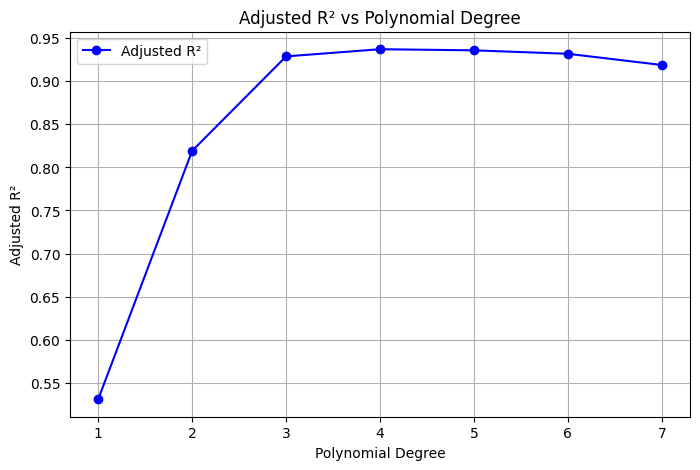

In [289]:
adjusted_r2_scores = []
degrees = list(range(1, 8))
n = len(y_test)

for model, poly in zip(models, polys):
        x_test_poly = poly.transform(x_test)
        y_pred = model.predict(x_test_poly)
        r2 = r2_score(y_test, y_pred)
        p = x_test_poly.shape[1] - 1  # exclude bias term
        r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
        adjusted_r2_scores.append(r2_adj)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(degrees, adjusted_r2_scores, marker='o', linestyle='-', color='blue', label='Adjusted R²')
plt.title('Adjusted R² vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Adjusted R²')
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()


## 7.4 Based on the adjusted 𝑅2 criterion, determine which model is the best for generalizing to unseen data. 

## Answer: Degree 4 with adjusted R2 = 0.9372

This Adjusted R2 is measured against the Test Data, so we can be rest assured that this is not an overfit for the model.


In [290]:
best_index = np.argmax(adjusted_r2_scores)
best_degree = best_index + 1 
best_adj_r2 = adjusted_r2_scores[best_index]

print(f"Answer: Degree {best_degree} with adjusted R2 = {best_adj_r2:.4f}")

Answer: Degree 4 with adjusted R2 = 0.9372


## 7.5 Write the full equation of the best polynomial regression model.

## Answer: Yhat = 24.9165 + 0.1673*X + -0.0050*X^2 + -0.0001*X^3 + 0.0000*X^4

In [291]:
intercept = models[best_index].intercept_
coefficients = models[best_index].coef_

max_degree = best_degree # from previous cell

feature_names = poly.get_feature_names_out(["X"])

terms = [f"{intercept:.4f}"]  # Start with intercept
for coef, name in zip(coefficients[1:], feature_names[1:]):  # Skip bias term
    terms.append(f"{coef:.4f}*{name}")

# Combine all terms into an equation
equation = " + ".join(terms)
print(f"Yhat = {equation}")


Yhat = 24.9165 + 0.1673*X + -0.0050*X^2 + -0.0001*X^3 + 0.0000*X^4


# Item 8

A = the event that Apple launches a product. 
B = the event that Samsung launches a product. 

Given 𝑃(𝐴) = 0.25,   𝑃(𝐴 ∩ 𝐵) = 0.15,     𝑃(𝐴′ ∩ 𝐵′) = 0.17, answer the following questions (note that 𝐴′ is the complement of 𝐴):


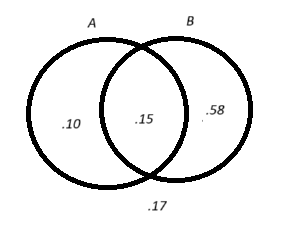

## 8.1 . Find the probability that Samsung will launch a product on a randomly selected business period. 

## Answer: 0.15 + 0.58 == 0.73 (73%)

## 8.2  Find the probability that Samsung will launch a product given that Apple launched a product. 
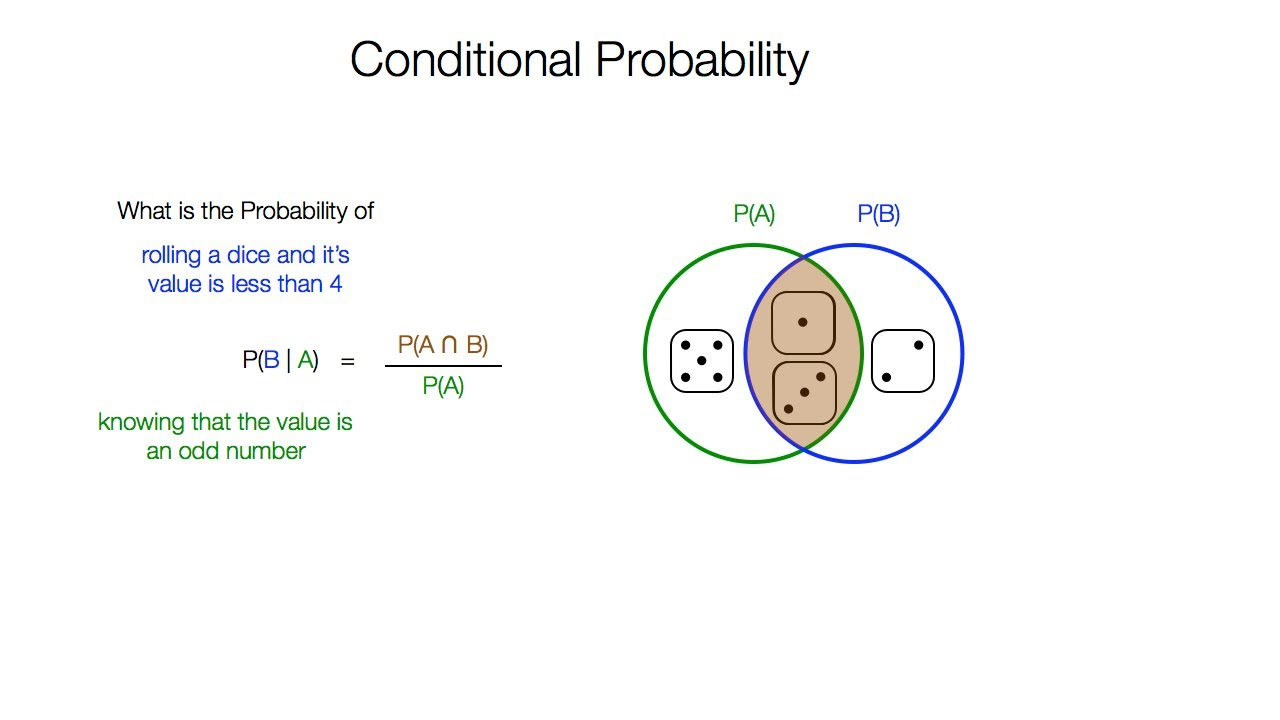

## Answer = 0.6 (60%)

In [238]:
print("Probability of B given A: ", 0.15/0.25)

Probability of B given A:  0.6


## 8.3 Determine if A and B are independent events.

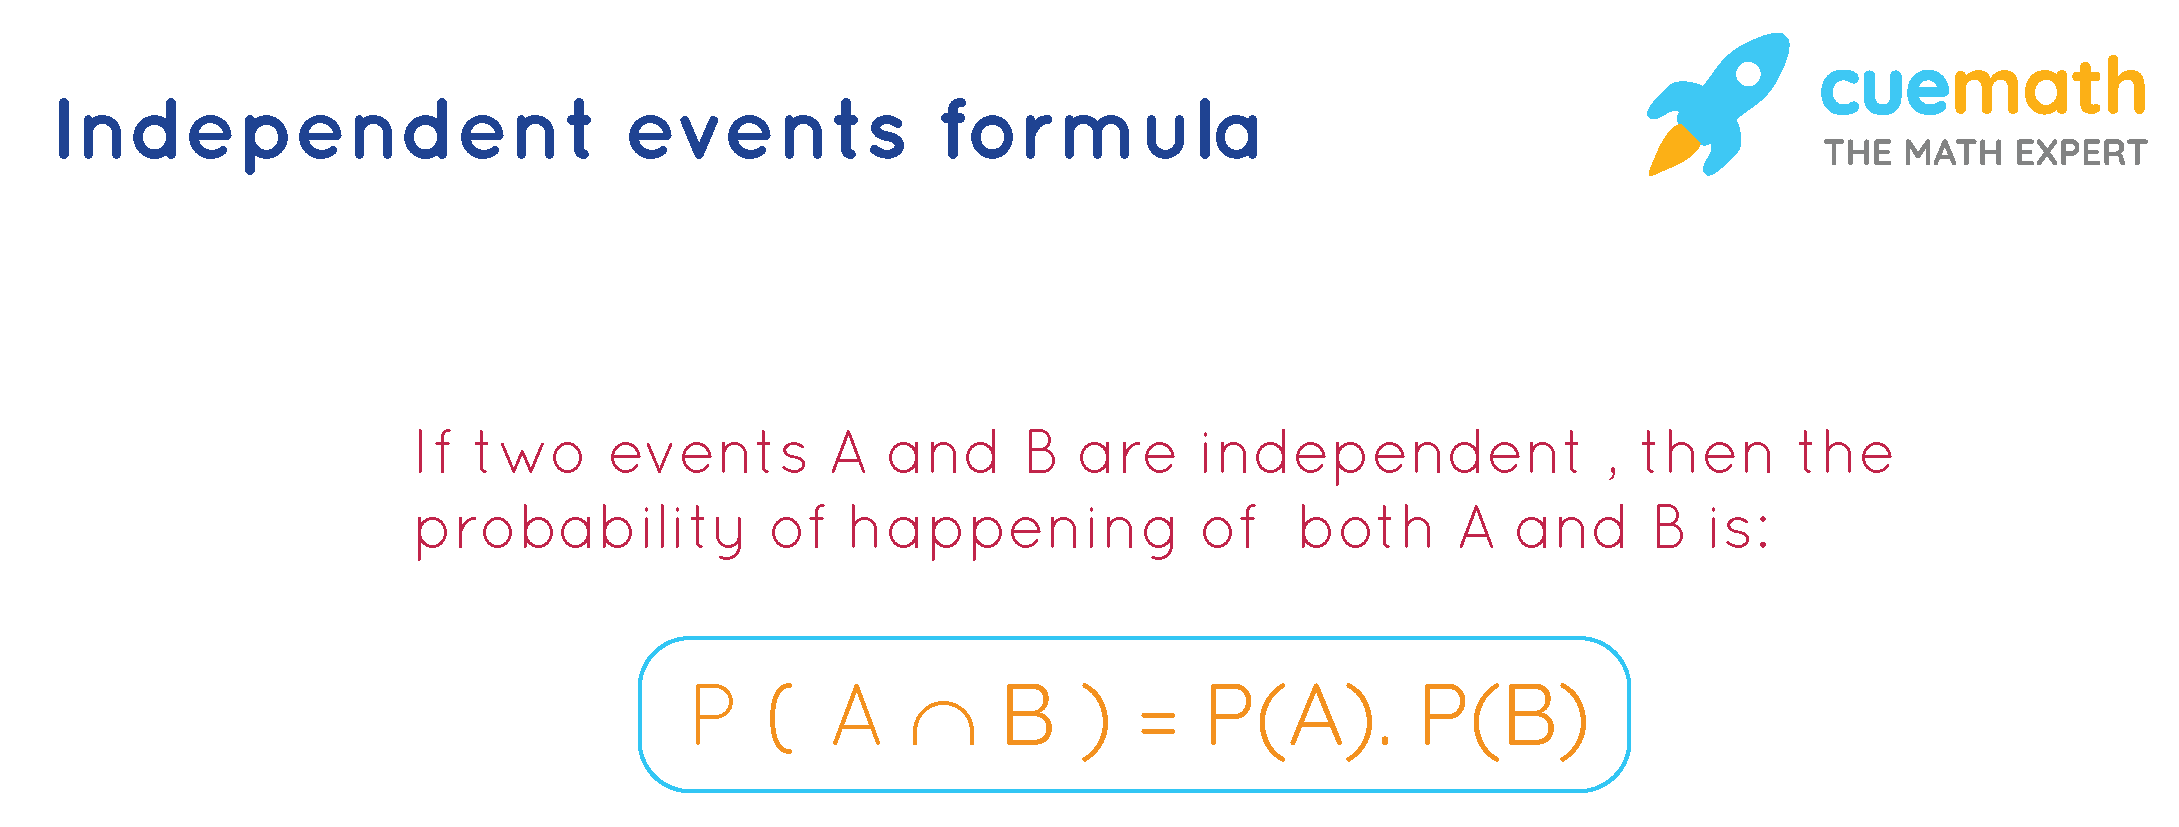

## Answer: INDEPENDENT

In [239]:
A_AND_B = 0.15
A = 0.25
B = 0.73

print("Dependent" if (A_AND_B == A * B) else "Independent")

Independent


# Item 9

## Solution Setup

In [240]:
x = np.array([0, 1, 2, 3])
p = np.array([0.4, 0.3, 0.2, 0.1])

## 9.1 Find the expectation of X

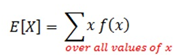

## Answer: 1.0

In [241]:
expectation_x = np.sum(x*p)
print(f'Expectation of X = {expectation_x:.2f}')

Expectation of X = 1.00


## 9.2 Calculate the second theoretical moment of X
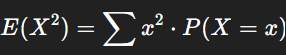

## Answer: 2.00

In [242]:
second_theoretical_moment_x = np.sum((x ** 2) * p)
print(f'Second Theoretical moment of X = {second_theoretical_moment_x:.2f}')

Second Theoretical moment of X = 2.00


## 9.3 Calculate the variance of X

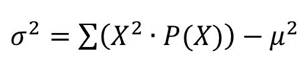

The summation part is just the 2nd theoretical moment, just substitute
Whereas the expectation and the mean are just the same

## Answer: 1.0

In [243]:
variance = second_theoretical_moment_x - expectation_x**2
print(f'Variance = {variance:.2f}')

Variance = 1.00


## 9.4. Calculate the variance of a new random variable 𝑌 = 5− 3𝑋.

Solution:
 - Var(X) is 1.0 (From previous answers)
 - Y = aX + b, where a = -3 & b = 5

 Using the formula to get the new variance from the slope and variance of X:
 - Var(Y) = (a)**2 * Var(x)
 - Var(Y) = (−3)**2 * (1.0)
 - Var(Y) = 9.0 * 1.0
 - Var(Y) = 9.0

## Answer: 9.0

# Item 10 Answer in PDF